# Text Readability Models
Script imports cleaned text data and builds machine learning models to evaluate the readability of texts.

In [1]:
# Import packages
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ClassificationReport
import pandas as pd
import matplotlib.pyplot as plt
import os
import dill

/anaconda3/envs/SimpleGPT2/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# Set seed so results can be reproduced
randomseed = 20200922

# Change working directory to project folder
ClnDat = '../data_clean/'

# Indicate which file to load
FileName = 'OSE_TextFeat'

# Load data
TextDF = pd.read_csv(ClnDat+FileName+'.csv')

# Figure save location
FigLoc = '../figures/'

In [3]:
# Preprocess data

# Label encoder
le = preprocessing.LabelEncoder()

# Define predictor variables
PredVars = ['difficulty', 'lex_sent', 'syll_lex', 'n_syll']

# Subset TextDF to desired variables
MLDat = TextDF[['level']+PredVars].reset_index().drop(columns = ['index'])
MLDat['level'] = le.fit_transform(MLDat['level'])

# Target and predictor variables
y = MLDat['level']
X = MLDat[PredVars]

# Split data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = randomseed)

In [4]:
# Get identifiers for different levels of text
pd.DataFrame(list(zip(y, TextDF['level'])), columns = ['label', 'level']).drop_duplicates().reset_index(drop = True)

,label,level
0,1,ele
1,2,int
2,0,adv


Accuracy Score: 0.7543859649122807


/anaconda3/envs/SimpleGPT2/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


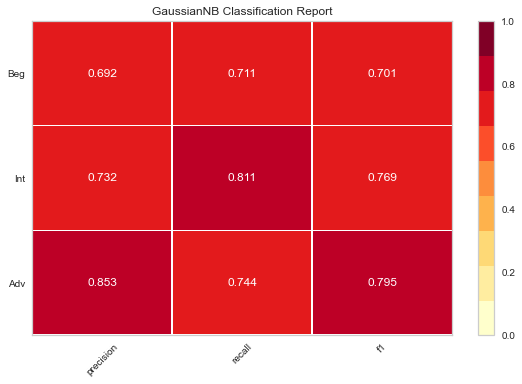

In [5]:
# Gaussian Naive Bayes Model
gnb = GaussianNB()
pred = gnb.fit(X_train, y_train).predict(X_test)
print('Accuracy Score: ' + str(accuracy_score(y_test, pred, normalize = True)))
visualizer = ClassificationReport(gnb, classes = ['Adv', 'Int', 'Beg'])
visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
for label in visualizer.ax.texts: # Change size of figure text
    label.set_size(12)
g = visualizer.poof(FigLoc + 'gnb_accurary.png', dpi = 300, transparent = True)

/anaconda3/envs/SimpleGPT2/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/envs/SimpleGPT2/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


Accuracy Score: 0.41228070175438597


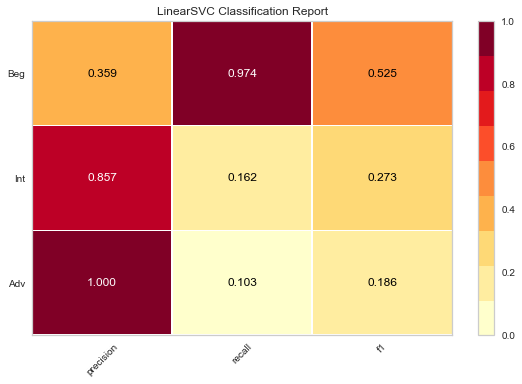

In [6]:
# Linear support vector classification
svc = LinearSVC(random_state = randomseed, max_iter = 1000)
pred = svc.fit(X_train, y_train).predict(X_test)
print('Accuracy Score: ' + str(accuracy_score(y_test, pred, normalize = True)))
visualizer = ClassificationReport(svc, classes = ['Adv', 'Int', 'Beg'])
visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
for label in visualizer.ax.texts: # Change size of figure text
    label.set_size(12)
g = visualizer.poof(FigLoc + 'svc_accurary.png', dpi = 300, transparent = True)

Accuracy Score: 0.6578947368421053


/anaconda3/envs/SimpleGPT2/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


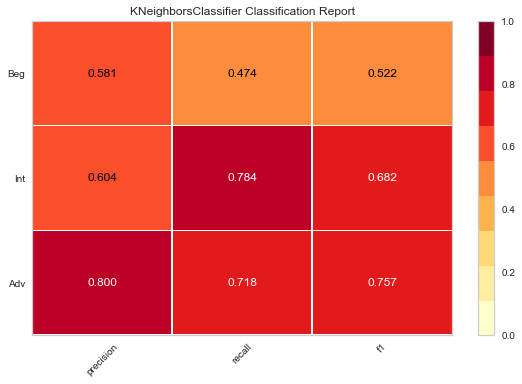

In [7]:
# K neighbors classifier
knc = KNeighborsClassifier(n_neighbors = 3)
knc.fit(X_train, y_train)
pred = knc.predict(X_test)
print('Accuracy Score: ' + str(accuracy_score(y_test, pred, normalize = True)))
visualizer = ClassificationReport(knc, classes = ['Adv', 'Int', 'Beg'])
visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
for label in visualizer.ax.texts: # Change size of figure text
    label.set_size(12)
g = visualizer.poof(FigLoc + 'knc_accurary.png', dpi = 300, transparent = True)

Accuracy Score: 0.7807017543859649


/anaconda3/envs/SimpleGPT2/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


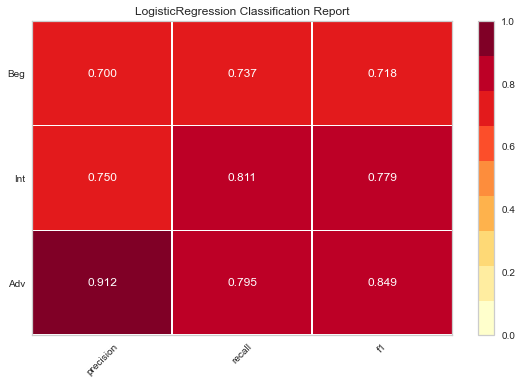

In [8]:
# Multinomial logistic regression
mlr = LogisticRegression(max_iter = 1500)
pred = mlr.fit(X_train, y_train).predict(X_test)
print('Accuracy Score: ' + str(accuracy_score(y_test, pred, normalize = True)))
visualizer = ClassificationReport(mlr, classes = ['Adv', 'Int', 'Beg'])
visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
for label in visualizer.ax.texts: # Change size of figure text
    label.set_size(12)
g = visualizer.poof(FigLoc + 'mlr_accurary.png', dpi = 300, transparent = True)

In [ ]:
# Save Naive Bayes Model
outfile = open('text_difficulty.pickle', 'wb')
dill.dump(gnb, outfile)
outfile.close()